In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("/Users/yashkumar/Desktop/datasets/Bengaluru_House_Data.csv")
df1.head()
df1.tail(15)
df1.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1.count()

area_type       13320
availability    13320
location        13319
size            13304
society          7818
total_sqft      13320
bath            13247
balcony         12711
price           13320
dtype: int64

In [7]:
df1 = df1.drop_duplicates()
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
print(df1.isnull().sum())

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64


In [9]:
df1 = df1.dropna()
df1.count()

area_type       7144
availability    7144
location        7144
size            7144
society         7144
total_sqft      7144
bath            7144
balcony         7144
price           7144
dtype: int64

In [10]:
print(df1.isnull().sum())

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64


<AxesSubplot:xlabel='bath'>

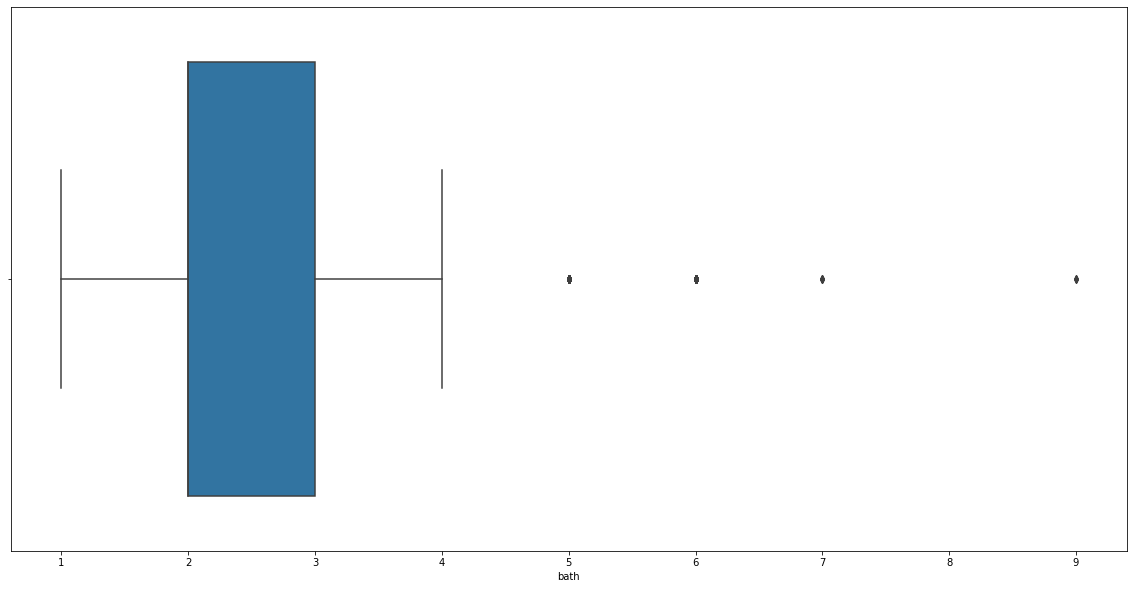

In [11]:
sns.boxplot(x=df1["bath"])

<AxesSubplot:>

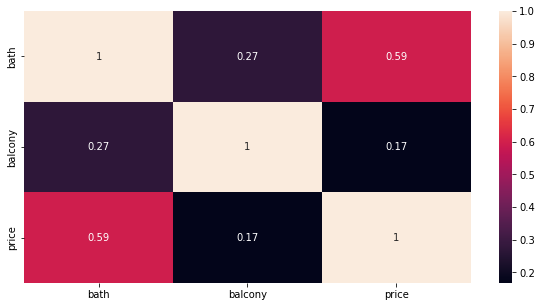

In [12]:
plt.figure(figsize=(10,5))
c= df1.corr()
sns.heatmap(c,annot=True)

Drop features that are not required to build our model

In [13]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape
df1.tail(15)
df1.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [14]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '4 BHK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '2 Bedroom',
       '6 BHK', '7 BHK', '6 Bedroom'], dtype=object)

In [15]:
df2['bhk'] = df2['size'].apply(lambda  x : int(x.split(' ')[0]))
df2.bhk.unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7])

No Confusion between 2 room and 2 BHK anymore

In [16]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
5,Whitefield,2 BHK,1170,2.0,38.00,2
11,Whitefield,4 Bedroom,2785,5.0,295.00,4


In [17]:
#BHK becomes int datatype

In [18]:
df2.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
bhk             int64
dtype: object

In [19]:
df2.total_sqft.unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [21]:
df2[~df2['total_sqft'].apply(is_float)].head(20) #~ nigget operator

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,59.935,2
850,Bannerghatta Road,2 BHK,1115 - 1130,2.0,58.935,2


In [22]:
#function to take average of ranges
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [23]:
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num)
df3 = df3[df3.total_sqft.notnull()]
df3.head(20)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,38.00,2
14,Sarjapur,3 Bedroom,2250.0,3.0,148.00,3
15,Mysore Road,2 BHK,1175.0,2.0,73.50,2
16,Bisuvanahalli,3 BHK,1180.0,3.0,48.00,3
17,Raja Rajeshwari Nagar,3 BHK,1540.0,3.0,60.00,3


In [24]:
df3.dtypes #total_sqft becomes float datatype

location       object
size           object
total_sqft    float64
bath          float64
price         float64
bhk             int64
dtype: object

In [25]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft'] #dividing two columsns
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4,10592.459605


<AxesSubplot:xlabel='total_sqft'>

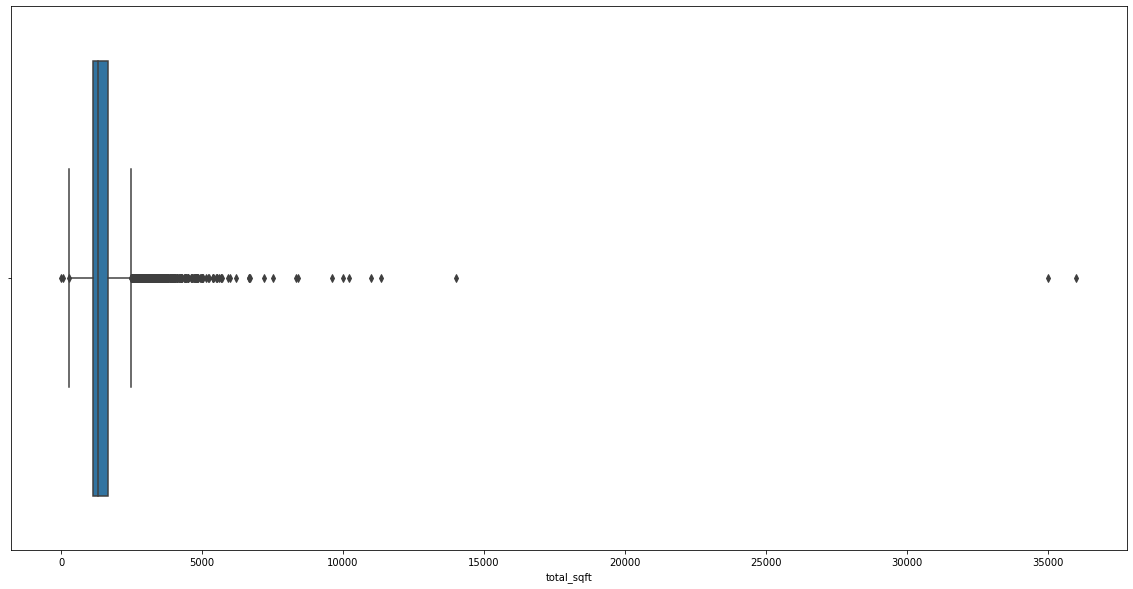

In [26]:
sns.boxplot(x=df4["total_sqft"]) #many outliers are present

In [27]:
df4.location.unique() #many unique locations are present

array(['Electronic City Phase II', 'Chikka Tirupathi',
       'Lingadheeranahalli', 'Whitefield', '7th Phase JP Nagar',
       'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Ramakrishnappa Layout', 'Binny Pete',
       'Thanisandra', ' Thanisandra', 'Electronic City',
       'Ramagondanahalli', 'Yelahanka', 'Hebbal', 'Kanakpura Road',
       'Kundalahalli', 'Sarjapur  Road', 'Ganga Nagar', 'Doddathoguru',
       'Adarsh Nagar', 'Bhoganhalli', 'Lakshminarayana Pura',
       'Begur Road', 'Varthur', 'Gunjur', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Cholanayakanahalli', 'Kodanda Reddy Layout',
       'EPIP Zone', 'Dasanapura', 'Kasavanhalli', 'Sanjay nagar',
       'Kengeri', 'Yeshwanthpur', 'Chandapura', 'Kothanur',
       'Green View Layout', 'Shantiniketan Layout', 'Rajaji Nagar',
       'Devanahalli', 'Byatarayanapura', 'Akshaya Nagar',
       'LB Shastri Nagar', 'Hormavu', 'Peenya', 'Kudlu Gate',
       '8th Phase JP Nagar', 'Chandra Layout

In [28]:
len(df4.location.unique())

633

In [29]:
df4.location = df4.location.apply(lambda x : x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield                        382
Sarjapur  Road                    297
Electronic City                   231
Thanisandra                       209
Kanakpura Road                    195
                                 ... 
Kattigenahalli                      1
Kashi Nagar                         1
Kamakshipalya                       1
Kalhalli                            1
Yeshwanthpur Industrial Suburb      1
Name: location, Length: 625, dtype: int64

In [30]:
len(location_stats[location_stats<=10])

486

In [31]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Amruthahalli                      10
Vidyaranyapura                    10
Dairy Circle                      10
Marsur                            10
Rayasandra                        10
                                  ..
Kattigenahalli                     1
Kashi Nagar                        1
Kamakshipalya                      1
Kalhalli                           1
Yeshwanthpur Industrial Suburb     1
Name: location, Length: 486, dtype: int64

In [32]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

140

In [33]:
df4.shape

(7129, 7)

In [34]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(7089, 7)

<AxesSubplot:xlabel='price_per_sqft'>

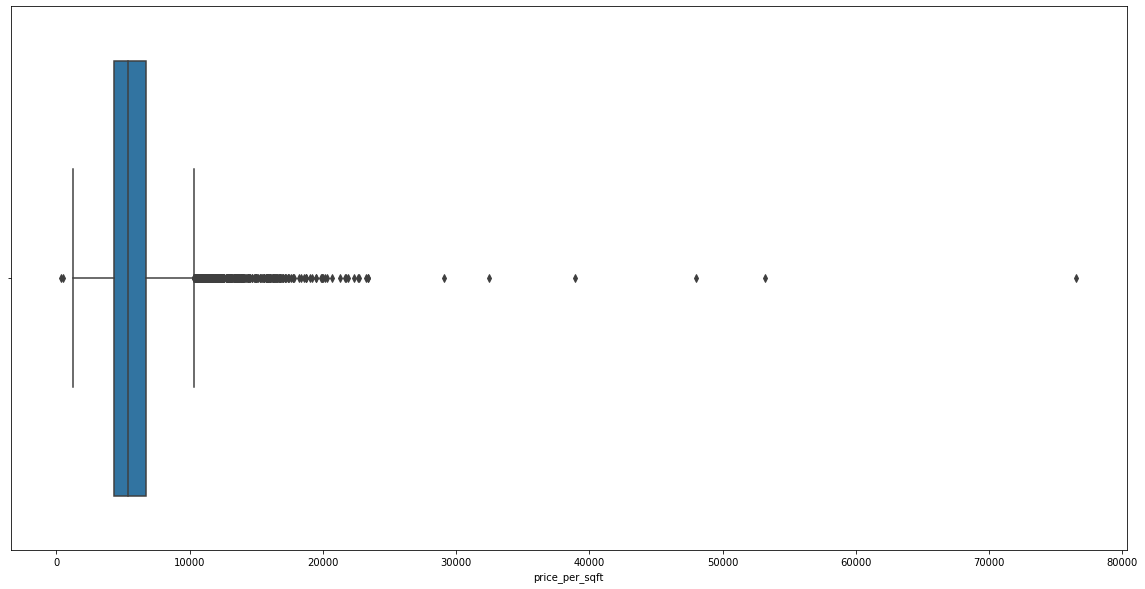

In [35]:
sns.boxplot(x=df5["price_per_sqft"]) #many outliers are present

In [36]:
df5.price_per_sqft.describe()

count     7089.000000
mean      5886.037797
std       2738.814973
min        371.428571
25%       4307.692308
50%       5349.579832
75%       6713.554987
max      76530.612245
Name: price_per_sqft, dtype: float64

Outlier Removal Using Standard Deviation and Mean

In [37]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft) #mean
        st = np.std(subdf.price_per_sqft) #standard deviation
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(5522, 7)

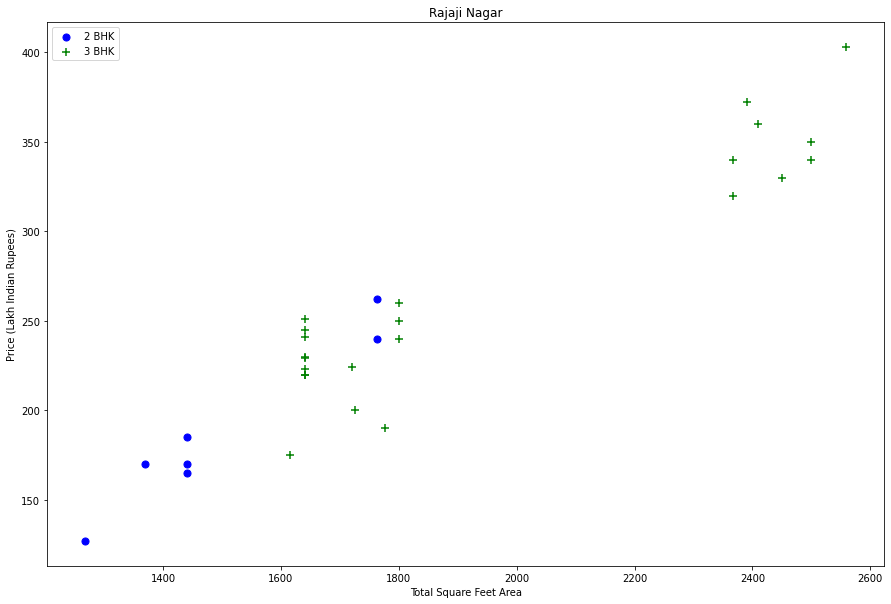

In [38]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df6,"Rajaji Nagar")

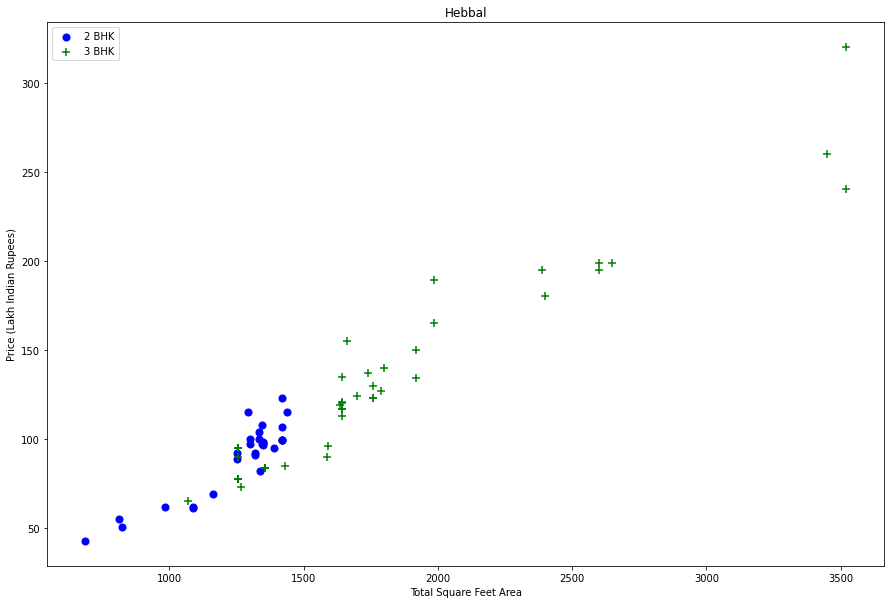

In [39]:
plot_scatter_chart(df6,"Hebbal")

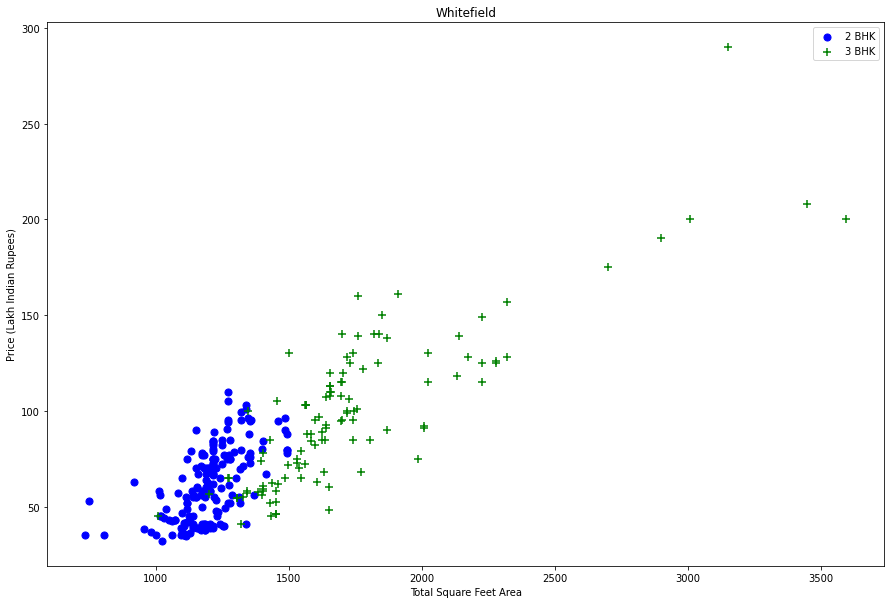

In [40]:
plot_scatter_chart(df6,"Whitefield")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [41]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft), #new dataset created for location based on Location
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                 #data points which lie neyond mean are removed
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df8 = df7.copy()
df8.shape

(3813, 7)

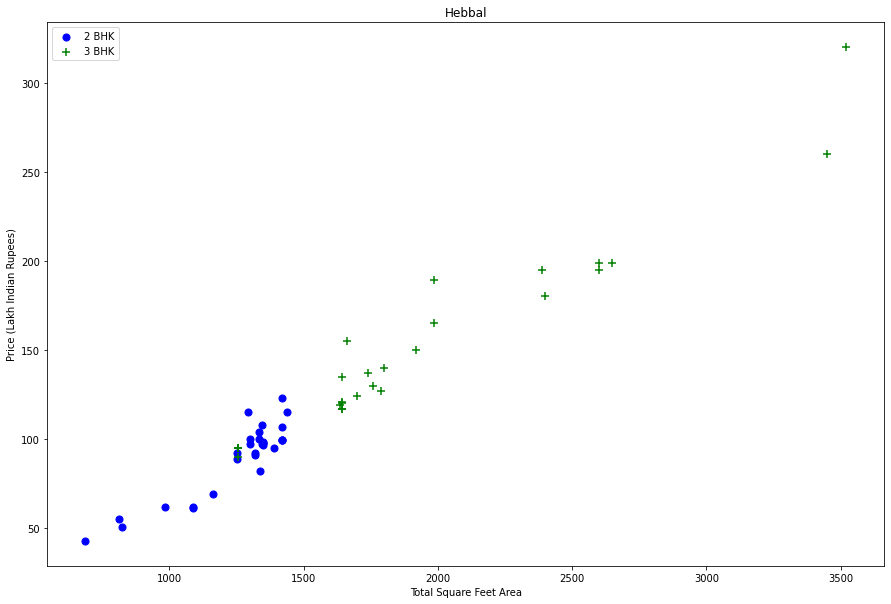

In [42]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

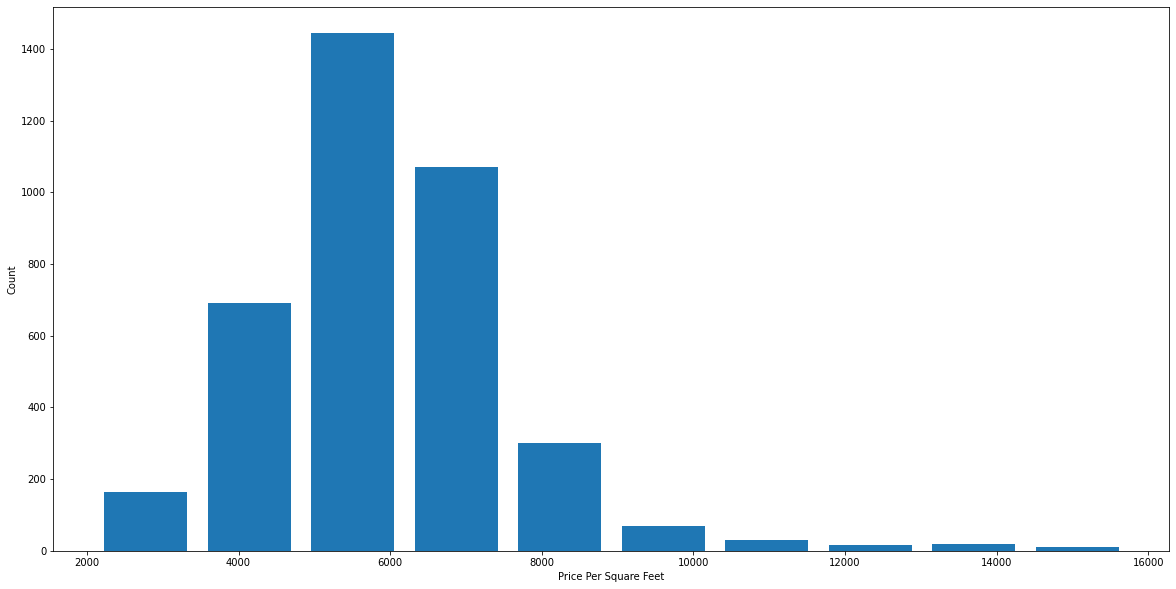

In [43]:

import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

NEXT FEATURE OUTLIER REMOVAL


In [44]:
df8.bath.unique()

array([4., 3., 2., 5., 1., 6., 7., 9.])

<AxesSubplot:xlabel='bath'>

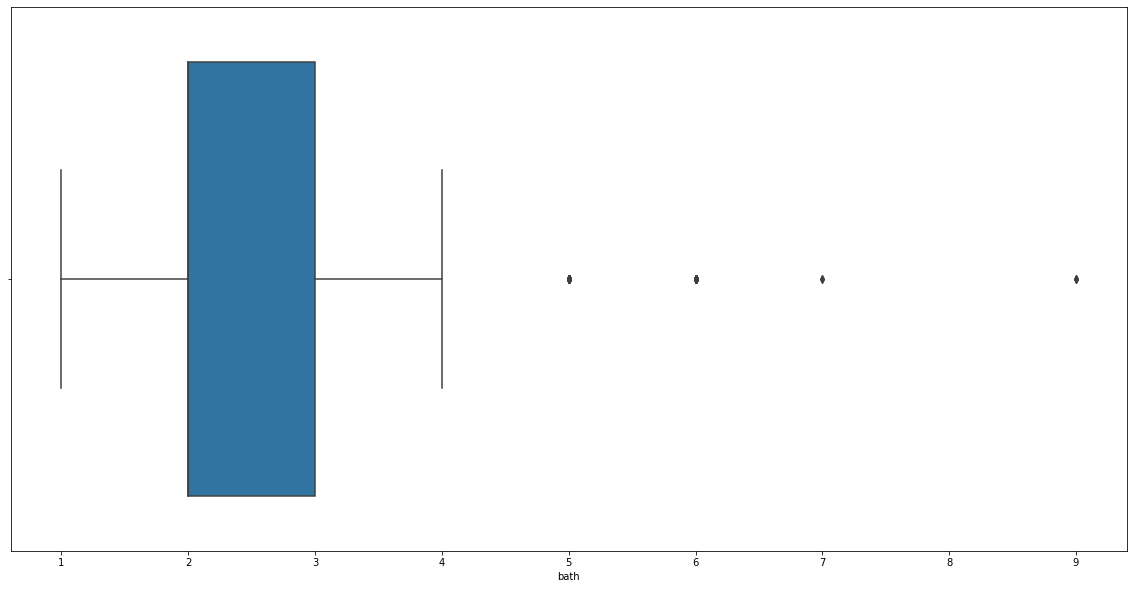

In [45]:
sns.boxplot(x=df8["bath"]) #a few outliers are present

Text(0.5, 0, 'Count')

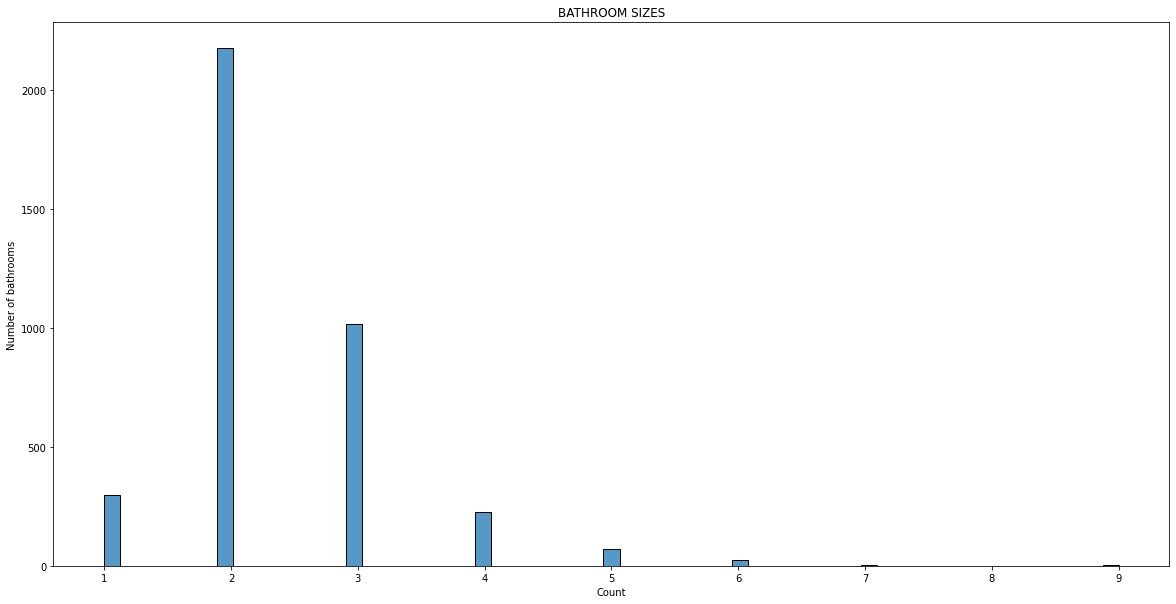

In [46]:
sns.histplot(x=df8["bath"])
plt.title("BATHROOM SIZES")
plt.ylabel("Number of bathrooms")
plt.xlabel("Count")

In [47]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [48]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3496,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
4528,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [49]:
df9 = df8[df8.bath<df8.bhk+2] #removing bathrooms if number of bathroom > bedroom + 2
df9.shape

(3773, 7)

In [50]:
df9.head(20)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
1,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
2,1st Phase JP Nagar,2 BHK,1394.0,2.0,100.0,2,7173.601148
3,1st Phase JP Nagar,2 BHK,1077.0,2.0,93.0,2,8635.097493
4,1st Phase JP Nagar,3 BHK,1590.0,3.0,131.0,3,8238.993711
5,1st Phase JP Nagar,3 BHK,2180.0,3.0,210.0,3,9633.027523
6,1st Phase JP Nagar,3 BHK,2077.0,3.0,175.0,3,8425.613866
7,1st Phase JP Nagar,2 BHK,1205.0,2.0,85.0,2,7053.941909
8,1st Phase JP Nagar,4 BHK,2615.0,5.0,222.0,4,8489.483748
9,5th Phase JP Nagar,2 BHK,1150.0,3.0,52.5,2,4565.217391


In [51]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns') #for size we have BHK feature
df10.head(10)

,location,total_sqft,bath,price,bhk
0,1st Phase JP Nagar,2825.0,4.0,250.0,4
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,1394.0,2.0,100.0,2
3,1st Phase JP Nagar,1077.0,2.0,93.0,2
4,1st Phase JP Nagar,1590.0,3.0,131.0,3
5,1st Phase JP Nagar,2180.0,3.0,210.0,3
6,1st Phase JP Nagar,2077.0,3.0,175.0,3
7,1st Phase JP Nagar,1205.0,2.0,85.0,2
8,1st Phase JP Nagar,2615.0,5.0,222.0,4
9,5th Phase JP Nagar,1150.0,3.0,52.5,2


In [52]:
df10.dtypes

location       object
total_sqft    float64
bath          float64
price         float64
bhk             int64
dtype: object

For ML model we need to convert "location" from object to numeric by using Use One Hot Encoding/ Dummies For Location

In [53]:
dummies = pd.get_dummies(df10.location)
dummies.head(10)

,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns') #combing df10 and dummies
#to avoid dummy variable trap removing one column
df11.head(10)

,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1st Phase JP Nagar,2825.0,4.0,250.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,1394.0,2.0,100.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,1077.0,2.0,93.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Phase JP Nagar,1590.0,3.0,131.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Phase JP Nagar,2180.0,3.0,210.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Phase JP Nagar,2077.0,3.0,175.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1st Phase JP Nagar,1205.0,2.0,85.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,2615.0,5.0,222.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5th Phase JP Nagar,1150.0,3.0,52.5,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df12 = df11.drop('location',axis='columns') #as location is covered in dummy
df12.head(10)

,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,250.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1394.0,2.0,100.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1077.0,2.0,93.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1590.0,3.0,131.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2180.0,3.0,210.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2077.0,3.0,175.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1205.0,2.0,85.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2615.0,5.0,222.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1150.0,3.0,52.5,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


BUILDING ML MODEL

In [56]:
df12.shape

(3773, 143)

In [57]:
X = df12.drop(['price'],axis='columns') #because X is dependent variable
X.head(10)

,total_sqft,bath,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1394.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1077.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1590.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2180.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2077.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1205.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2615.0,5.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1150.0,3.0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X.shape #all independent variable good for model training


(3773, 142)

In [59]:
Y = df12.price #for model testing
Y.head(10)

0    250.0
1    167.0
2    100.0
3     93.0
4    131.0
5    210.0
6    175.0
7     85.0
8    222.0
9     52.5
Name: price, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [61]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.9297426540078214

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #to shuffle the data

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.91577174, 0.91440355, 0.92688097, 0.89517532, 0.91678891])

In [63]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])




In [64]:
find_best_model_using_gridsearchcv(X,Y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the p

,model,best_score,best_params
0,linear_regression,0.913804,{'normalize': False}
1,lasso,0.785047,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.852107,"{'criterion': 'mse', 'splitter': 'best'}"


This shows linear refression is best model for our data.

In [65]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [66]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.97759308067943

In [67]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.12666432294601

In [68]:
predict_price('Indira Nagar',1000, 2, 2)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


109.20716696302203

In [69]:
predict_price('Indira Nagar',1000, 3, 3)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


109.3562382052886

In [70]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [71]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))